просто запусти

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, spearmanr, pearsonr

In [171]:
scaler = MinMaxScaler()

In [172]:
df = pd.read_csv("analysing_environmental_issues.csv", encoding='utf-8') # при тестах проводилось всё на начальных данных
df.head(5)

,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,2021-01-28 18:00:00,67.83,92.99,474.18,76.84,97.52,49.94,361.50,252.04,97.48,...,108.65,45.59,156.67,19.08,5.92,356.05,NaN,21.48,47.03,2.0
1,2021-01-28 19:00:00,67.83,91.82,473.68,76.15,97.82,48.55,354.75,244.87,97.66,...,108.71,45.89,156.76,19.15,5.94,357.69,NaN,21.48,45.05,2.0
2,2021-01-28 20:00:00,67.83,90.65,473.17,75.46,98.12,47.15,348.00,237.70,97.85,...,108.76,46.19,156.86,19.23,5.97,359.33,NaN,21.48,43.06,2.0
3,2021-01-28 21:00:00,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
4,2021-01-28 22:00:00,68.03,89.84,474.00,75.06,97.46,51.51,365.49,262.04,97.15,...,108.51,45.54,155.96,19.49,5.97,320.64,NaN,21.48,48.95,2.0


In [173]:
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
time_diffs = df['DateTime'].diff().dt.total_seconds()
time_diffs = time_diffs.fillna(0)

# нормализуем даты из столбца DateTime
normalized_diffs = scaler.fit_transform(time_diffs.values.reshape(-1, 1)).flatten()

# вычисляет кумулятивную сумму элементов
normalized_times = np.cumsum(normalized_diffs)

# подставляем нормализованные значение
df['DateTime'] = normalized_times

df.head(5)

,DateTime,stage_1_output_konv_avd,stage_2_input_water_sum,stage_2_output_bottom_pressure,stage_2_output_bottom_temp,stage_2_output_bottom_temp_hum_steam,stage_2_output_bottom_vacuum,stage_2_output_top_pressure,stage_2_output_top_pressure_at_end,stage_2_output_top_temp,...,stage_3_output_temp_hum_steam,stage_3_output_temp_top,stage_4_input_overheated_steam,stage_4_input_polymer,stage_4_input_steam,stage_4_input_water,stage_4_output_danger_gas,stage_4_output_dry_residue_avg,stage_4_output_product,work_shift
0,0.000000,67.83,92.99,474.18,76.84,97.52,49.94,361.50,252.04,97.48,...,108.65,45.59,156.67,19.08,5.92,356.05,NaN,21.48,47.03,2.0
1,0.000413,67.83,91.82,473.68,76.15,97.82,48.55,354.75,244.87,97.66,...,108.71,45.89,156.76,19.15,5.94,357.69,NaN,21.48,45.05,2.0
2,0.000826,67.83,90.65,473.17,75.46,98.12,47.15,348.00,237.70,97.85,...,108.76,46.19,156.86,19.23,5.97,359.33,NaN,21.48,43.06,2.0
3,0.001239,67.93,90.24,473.59,75.26,97.79,49.33,356.74,249.87,97.50,...,108.63,45.87,156.41,19.36,5.97,339.99,0.16,21.48,46.01,2.0
4,0.001652,68.03,89.84,474.00,75.06,97.46,51.51,365.49,262.04,97.15,...,108.51,45.54,155.96,19.49,5.97,320.64,NaN,21.48,48.95,2.0


Видно, что все выбросы значений в столбце опасного газа происходили в два отдельных промежутка времени. Исходя из этого, мы можем убрать лишние строки

#Функции, ранее нами изобретённые

In [177]:
def iqr_filter(df: pd.DataFrame, column: str, lower_bound=True, upper_bound=True, multp=3):
    """
    Гибкая функция для удаления выбросов с использованием настраиваемого порога IQR.
    """
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = (q3 - q1) * multp
    low_bound = q1 - iqr
    up_bound = q3 + iqr

    median = 0  # Значение медианы для замены
    outlines = 0  # Индексы строк, которые нужно заменить медианой

    # Находим выбросы и вычисляем медиану для ненавязчивых значений
    if lower_bound and upper_bound:
        outlines = df[(df[column] < low_bound) | (df[column] > up_bound)].index
        median = df[(df[column] >= low_bound) & (df[column] <= up_bound)][column].median()
    elif lower_bound:
        outlines = df[df[column] < low_bound].index
        median = df[df[column] >= low_bound][column].median()
    elif upper_bound:
        outlines = df[df[column] > up_bound].index
        median = df[df[column] <= up_bound][column].median()

    # Заменяем выбросы на медиану
    df.loc[outlines, column] = median

    return df


####################################################################################################


# Вторая функция: Ограничение и винзоризация для выбросов
def remove_outliers_and_handle_skewness(df, columns, threshold=1.5, cap_percentiles=(0.01, 0.99)):
    """
    Удаляет выбросы на основе асимметрии и применяет ограничение или преобразование.
    """
    df_cleaned = df.copy()

    for col in columns:
        # Обрабатываем асимметрию, применяя логарифмическое преобразование (если сильно асимметрично)
        if df[col].skew() > 1:
            df_cleaned[col] = np.log1p(df_cleaned[col])

        # Рассчитываем IQR для обнаружения выбросов
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        # Рассчитываем нижний и верхний пределы для выбросов
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Применяем ограничение для выбросов по IQR и заменяем выбросы на медиану или ограниченные значения
        outliers = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)


        # Заменяем выбросы на NaN используя булевую маску
        df_cleaned.loc[outliers, col] = np.nan

        # В качестве альтернативы, применяем винзоризацию, ограничивая значения на указанных процентилях (если нужно более мягкое ограничение)
        lower_cap = df_cleaned[col].quantile(cap_percentiles[0])
        upper_cap = df_cleaned[col].quantile(cap_percentiles[1])
        df_cleaned[col] = df_cleaned[col].clip(lower=lower_cap, upper=upper_cap)

    return df_cleaned


####################################################################################################


# Новая гибридная функция, которая решает, применять ли ограничение или замену медианой в зависимости от асимметрии и степени выбросов
def hybrid_outlier_handling(df: pd.DataFrame, columns: list, threshold=1.5, multp=3, cap_percentiles=(0.01, 0.99)):
    """
    Гибридная функция для выбора между ограничением или заменой выбросов медианой,
    в зависимости от асимметрии столбца и степени выбросов.
    """
    df_cleaned = df.copy()

    for col in columns:
        # Обрабатываем асимметрию до обработки выбросов
        if df[col].skew() > 1:  # Если сильно асимметрично, сначала применим преобразование
            df_cleaned[col] = np.log1p(df_cleaned[col])

        # Рассчитываем IQR для обнаружения выбросов
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Проверяем, есть ли экстремальные выбросы (за пределами 3x IQR)
        if any(df_cleaned[col] < (Q1 - 3 * IQR)) or any(df_cleaned[col] > (Q3 + 3 * IQR)):
            # Если есть экстремальные выбросы, заменяем их на медиану с помощью iqr_filter
            df_cleaned = iqr_filter(df_cleaned, col, lower_bound=True, upper_bound=True,multp=multp)
        else:
            # В противном случае ограничиваем выбросы с помощью remove_outliers_and_handle_skewness
            df_cleaned = remove_outliers_and_handle_skewness(df_cleaned, [col], threshold=threshold, cap_percentiles=cap_percentiles)

    return df_cleaned


####################################################################################################


def is_normal_distribution(data, alpha=0.05):
    """Проверка нормальности распределения с помощью теста Шапиро-Уилка."""
    stat, p_value = shapiro(data)
    print(f"Тест Шапиро-Уилка: W-статистика = {stat:.4f}, p-значение = {p_value:.2e}")
    return p_value > alpha  # True, если данные нормально распределены


def print_summary_statistics(label, data):
    # Вывод основных статистических характеристик
    print(f"{label}:")
    print(f"  Среднее значение = {data.mean():.4f}")
    print(f"  Медиана = {data.median():.4f}")
    print(f"  Стандартное отклонение = {data.std():.4f}")
    print(f"  Размер выборки = {len(data)}\n")


In [199]:
def test_hypothesis_4(target_column: pd.Series, factor_column: pd.Series):
    """
    Проверяет, связана ли доля опасного газа с количеством выходного продукта.
    """
    # Извлечение данных
    danger_gas = target_column # Доля опасного газа
    output_product = factor_column  # Количество выходного продукта

    # Основные статистические характеристики
    print("Основные статистические характеристики:")
    print(f"Средняя доля опасного газа: {danger_gas.mean():.4f}")
    print(f"Средний выход продукта: {output_product.mean():.4f}")

    # Проверка нормальности распределения
    print("\nПроверка нормальности распределения:")
    print("stage_4_output_danger_gas")
    danger_gas_normal = is_normal_distribution(danger_gas)
    print("stage_4_output_product")
    output_product_normal = is_normal_distribution(output_product)

    # Выбор метода корреляции
    print("\nАнализ корреляции:")
    if danger_gas_normal and output_product_normal:
        print("Обе переменные нормально распределены. Применяем корреляцию Пирсона.")
        corr_stat, p_value = pearsonr(danger_gas, output_product)
        method = "Коэффициент корреляции Пирсона"
    else:
        print("Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.")
        corr_stat, p_value = spearmanr(danger_gas, output_product)
        method = "Коэффициент ранговой корреляции Спирмена"

    # Результаты корреляции
    print("\nРезультаты корреляционного анализа:")
    print(f"{method}: {corr_stat:.4f}, p-значение: {p_value:.4e}")

    # Интерпретация результатов
    if p_value < 0.05:
        print(f"\nРезультат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.")
    else:
        print(f"\nРезультат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.")


#Графики, тесты, циферки, карты

(всё описание будет измененно к сдаче проекта)
Суть следующего кода вывести максимально удобно данные, которые помогут определить зависимst факторы со столбцом 'stage_4_output_danger_gas'.

Часть была скопированна из кода Алины для 4 гипотезы, категоризация от Агаты, а суть и принцип остальной части был озвучен в тг:
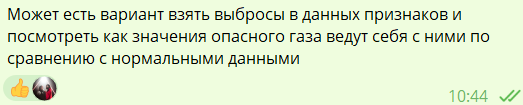


Меня лайкнул ментор, а это значит, что мы на верном пути :D

In [195]:
df = df[df['stage_4_output_danger_gas'].isnull() == False]

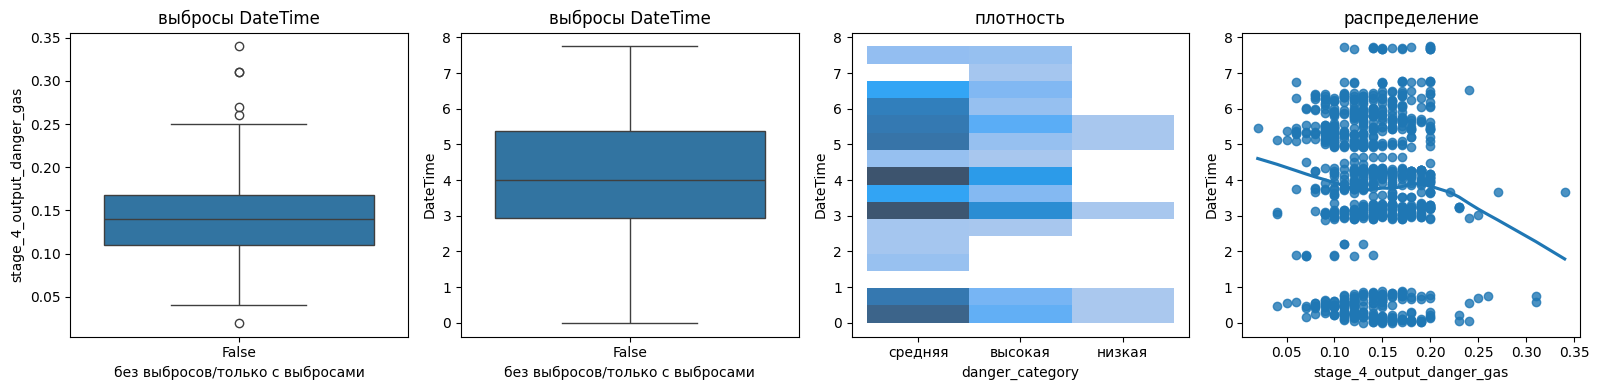

Проверка завимисости опасности газа с DateTime: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1401
Средний выход продукта: 3.6855

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.41e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9286, p-значение = 1.13e-20

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.0374, p-значение: 2.5413e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


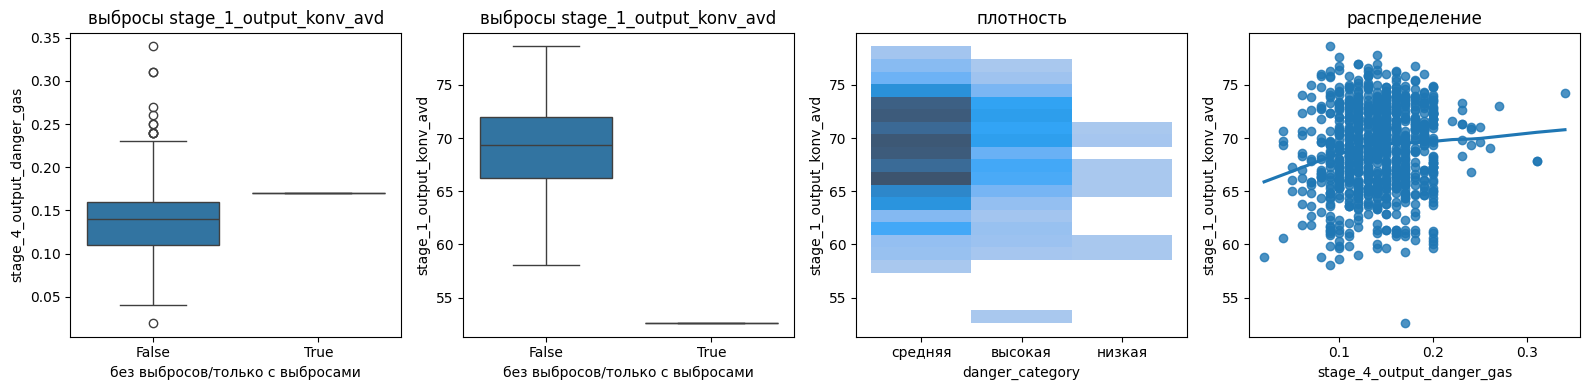

Проверка завимисости опасности газа с stage_1_output_konv_avd: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1401
Средний выход продукта: 69.0600

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 4.36e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9857, p-значение = 7.43e-08

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.1123, p-значение: 6.3297e-04

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


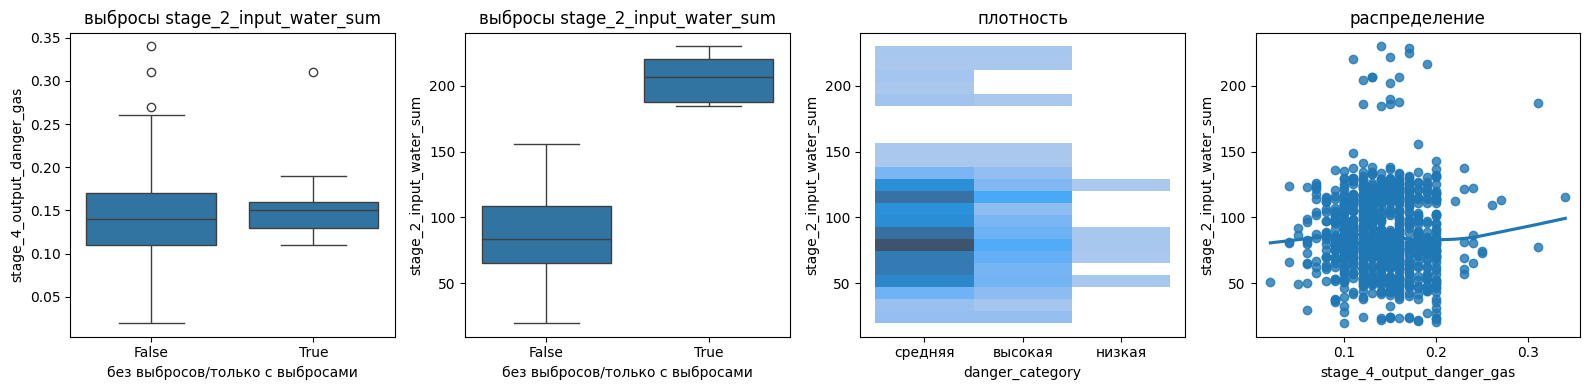

Проверка завимисости опасности газа с stage_2_input_water_sum: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1399
Средний выход продукта: 87.3300

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9794, p-значение = 4.06e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9494, p-значение = 3.24e-17

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.0267, p-значение: 4.1949e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


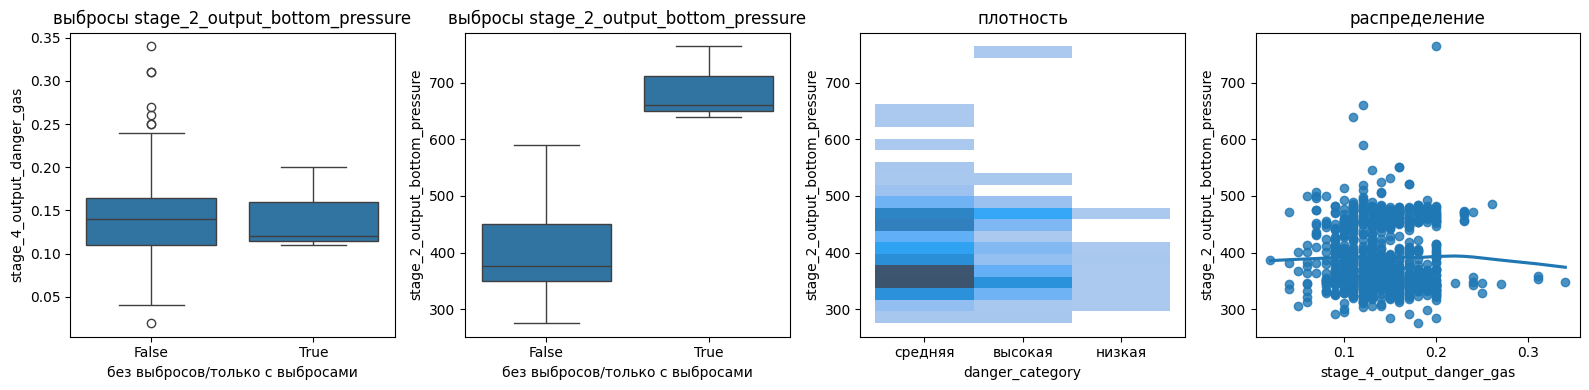

Проверка завимисости опасности газа с stage_2_output_bottom_pressure: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1400
Средний выход продукта: 395.1519

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9793, p-значение = 4.06e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9178, p-значение = 6.89e-22

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.0112, p-значение: 7.3514e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


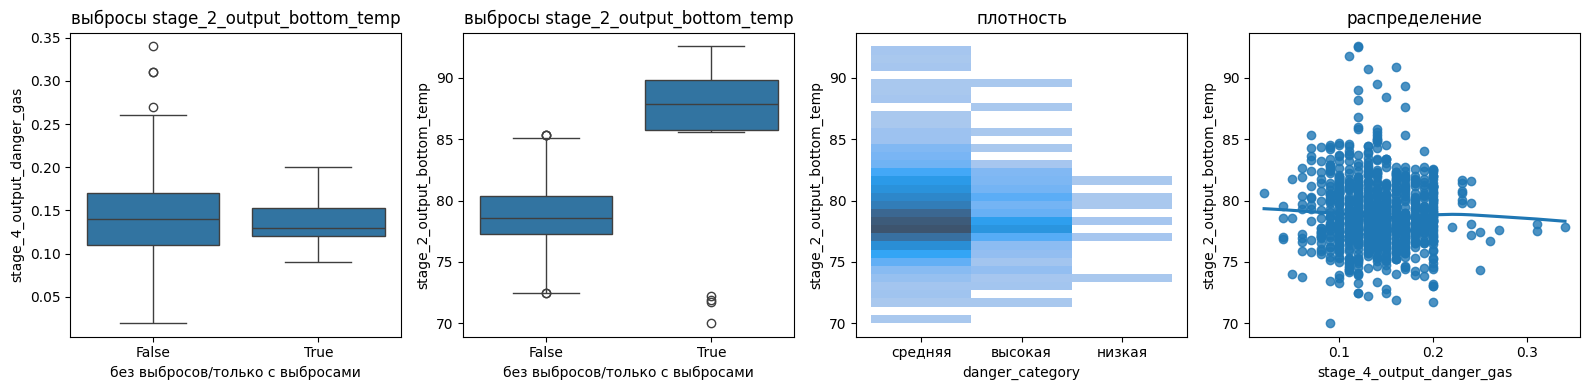

Проверка завимисости опасности газа с stage_2_output_bottom_temp: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1403
Средний выход продукта: 78.9445

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9793, p-значение = 3.45e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9605, p-значение = 4.01e-15

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.0416, p-значение: 2.0564e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


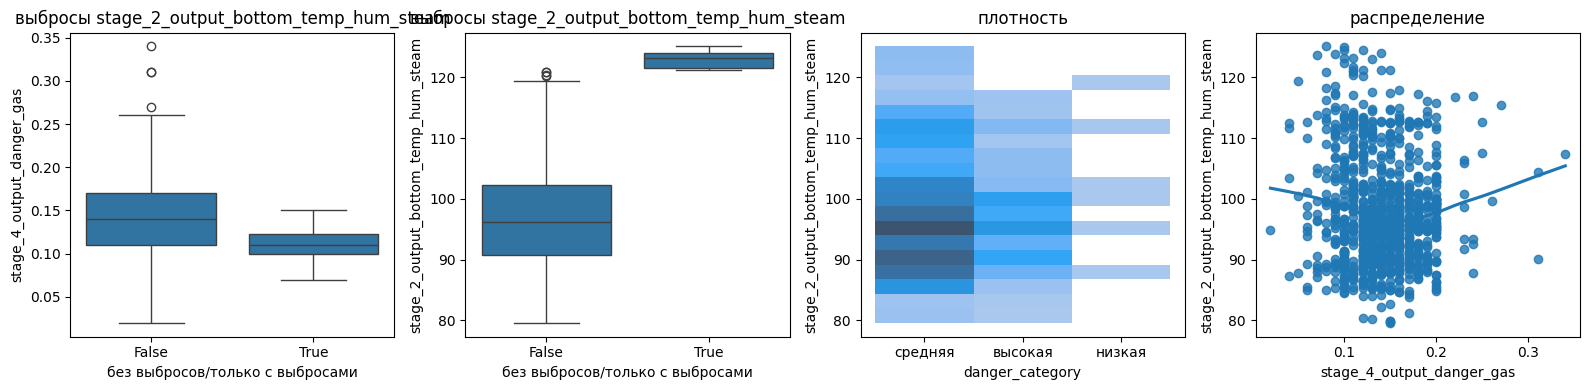

Проверка завимисости опасности газа с stage_2_output_bottom_temp_hum_steam: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1402
Средний выход продукта: 98.0341

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.69e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9584, p-значение = 1.33e-15

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.0656, p-значение: 4.5365e-02

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


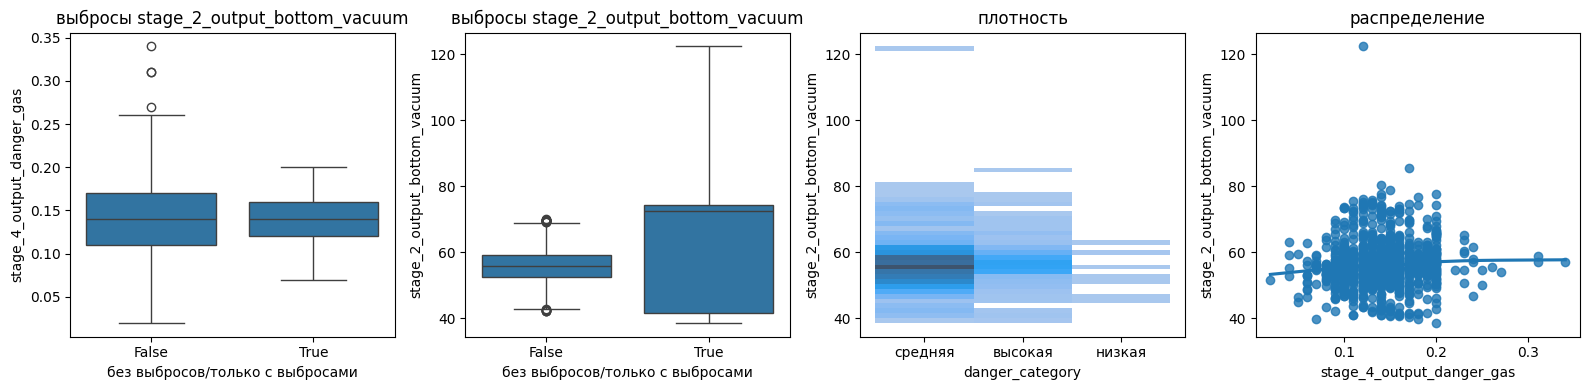

Проверка завимисости опасности газа с stage_2_output_bottom_vacuum: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1404
Средний выход продукта: 56.6715

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 5.40e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9358, p-значение = 2.38e-19

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.0797, p-значение: 1.6244e-02

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


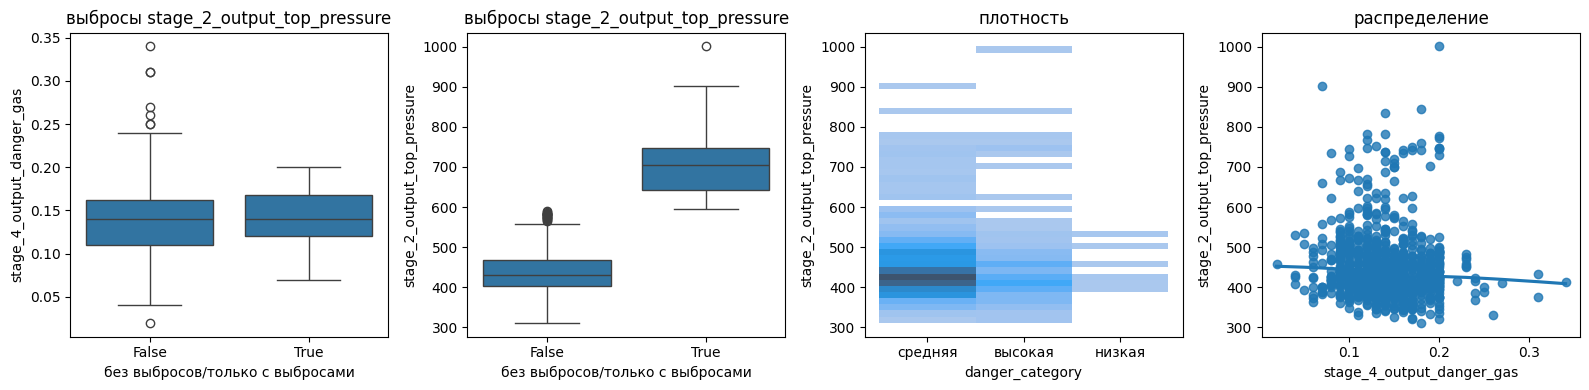

Проверка завимисости опасности газа с stage_2_output_top_pressure: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1402
Средний выход продукта: 453.1955

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.63e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.8202, p-значение = 5.39e-31

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.1342, p-значение: 4.0463e-05

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


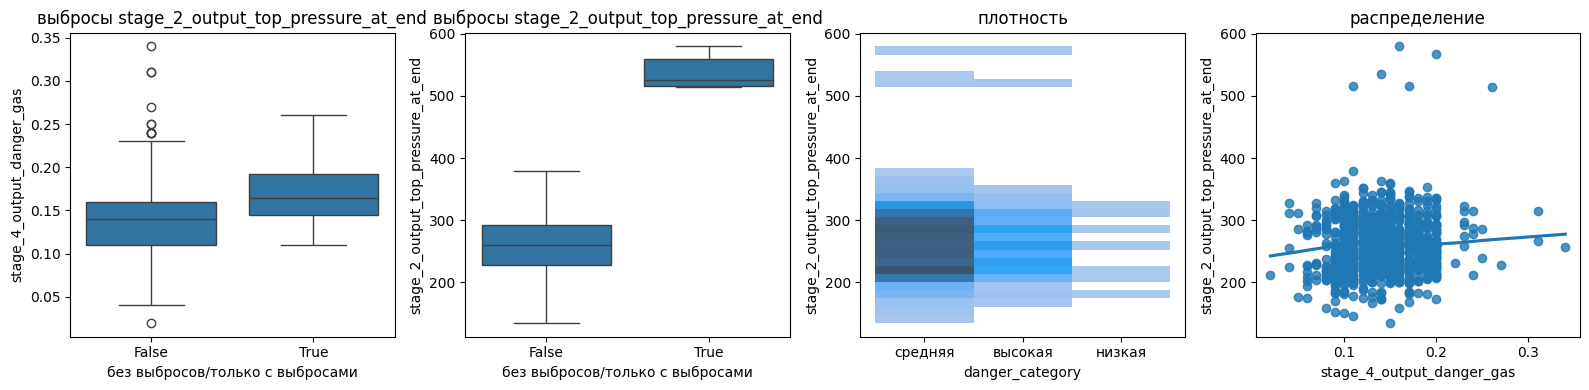

Проверка завимисости опасности газа с stage_2_output_top_pressure_at_end: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1402
Средний выход продукта: 262.8363

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.61e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9261, p-значение = 5.24e-21

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.0105, p-значение: 7.4796e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


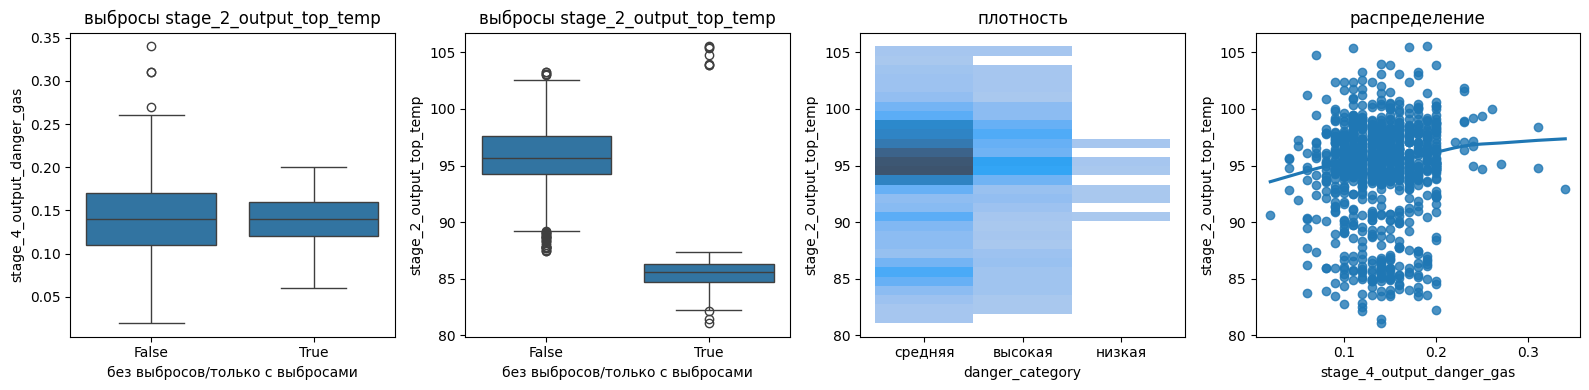

Проверка завимисости опасности газа с stage_2_output_top_temp: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1402
Средний выход продукта: 94.5341

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 4.12e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9272, p-значение = 9.31e-21

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.0651, p-значение: 4.7919e-02

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


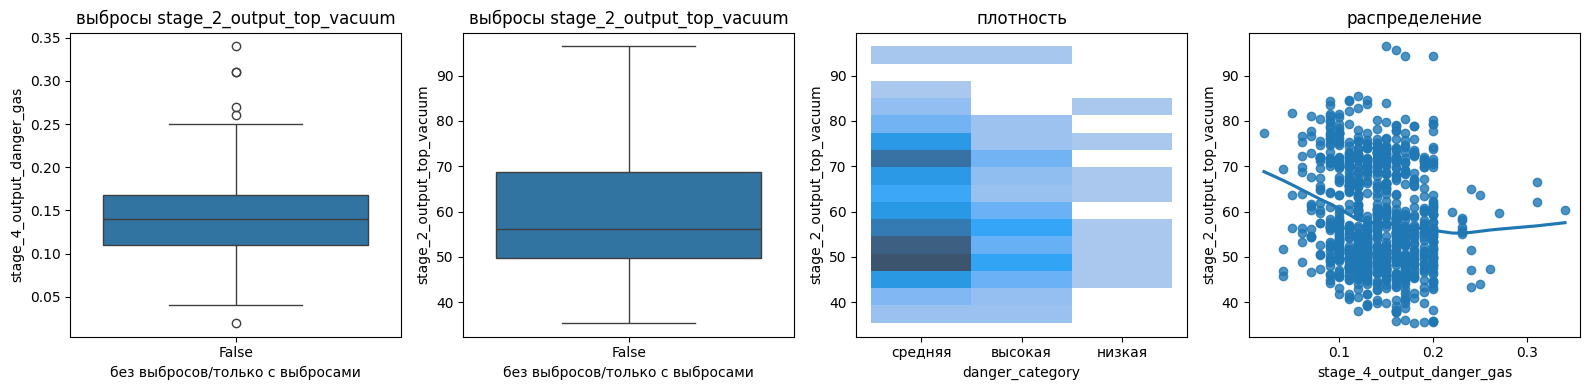

Проверка завимисости опасности газа с stage_2_output_top_vacuum: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1401
Средний выход продукта: 58.5492

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9792, p-значение = 3.32e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9611, p-значение = 5.75e-15

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.1414, p-значение: 1.6088e-05

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


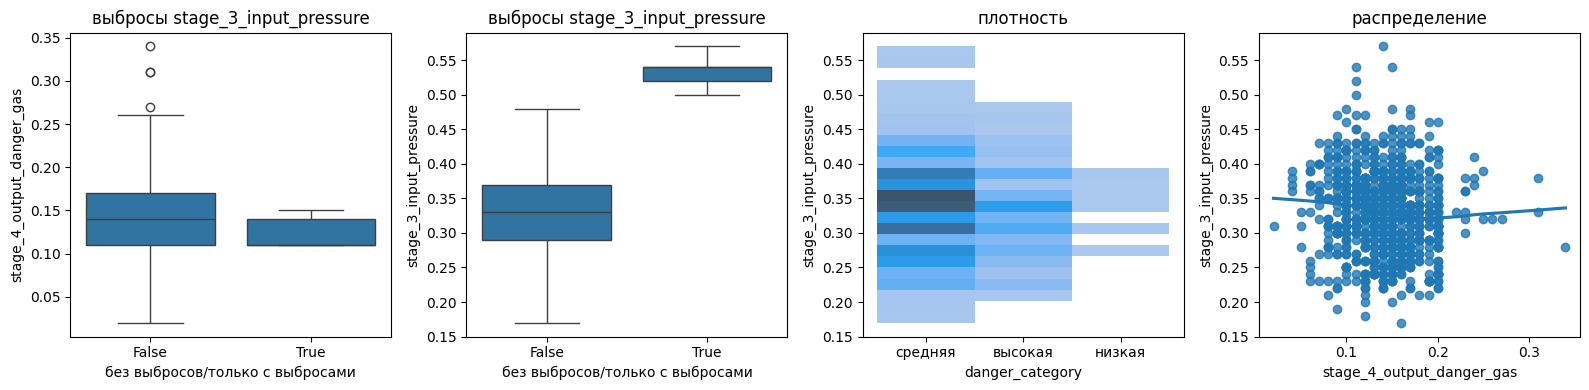

Проверка завимисости опасности газа с stage_3_input_pressure: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1400
Средний выход продукта: 0.3314

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9792, p-значение = 3.84e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9913, p-значение = 3.21e-05

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.1234, p-значение: 1.8023e-04

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


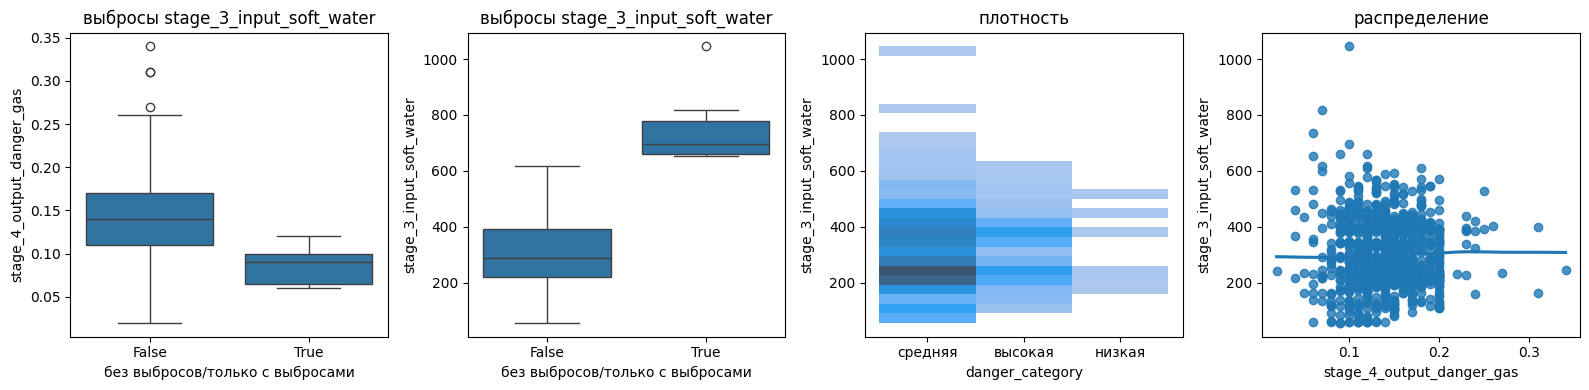

Проверка завимисости опасности газа с stage_3_input_soft_water: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1402
Средний выход продукта: 303.6336

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 4.05e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9756, p-значение = 2.58e-11

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.0370, p-значение: 2.6145e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


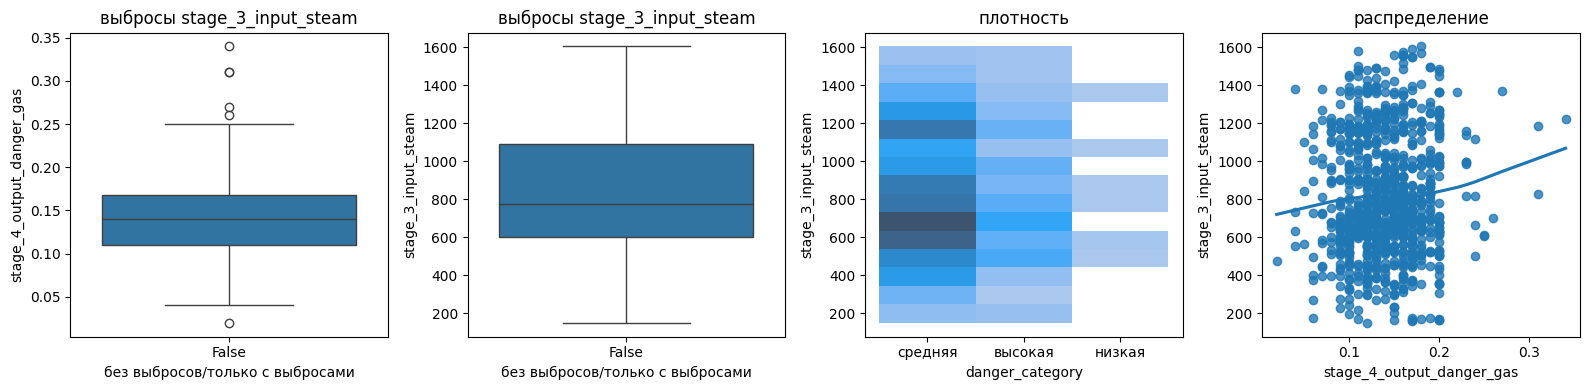

Проверка завимисости опасности газа с stage_3_input_steam: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1402
Средний выход продукта: 823.0909

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9794, p-значение = 3.28e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9789, p-значение = 2.19e-10

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.0401, p-значение: 2.2075e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


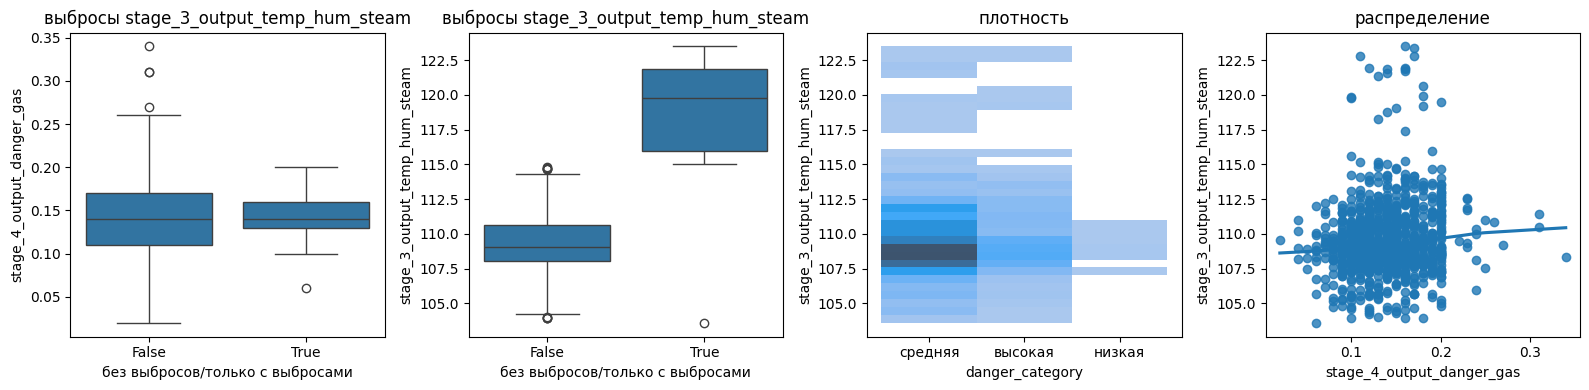

Проверка завимисости опасности газа с stage_3_output_temp_hum_steam: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1401
Средний выход продукта: 109.5800

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9794, p-значение = 3.33e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.8868, p-значение = 1.51e-25

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.1109, p-значение: 6.9550e-04

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


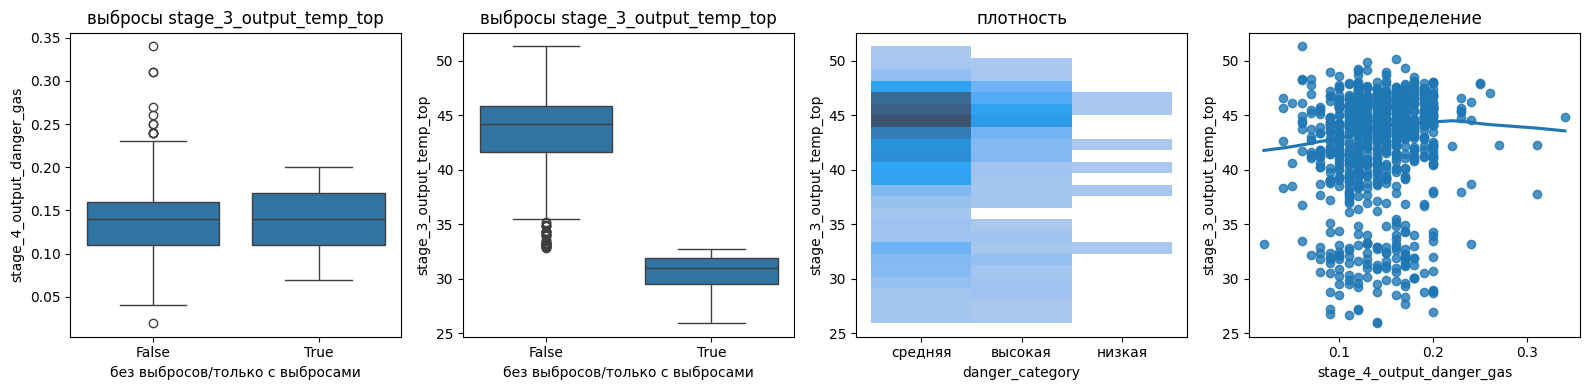

Проверка завимисости опасности газа с stage_3_output_temp_top: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1403
Средний выход продукта: 42.2787

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 4.39e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.8617, p-значение = 1.10e-27

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.1315, p-значение: 6.3322e-05

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


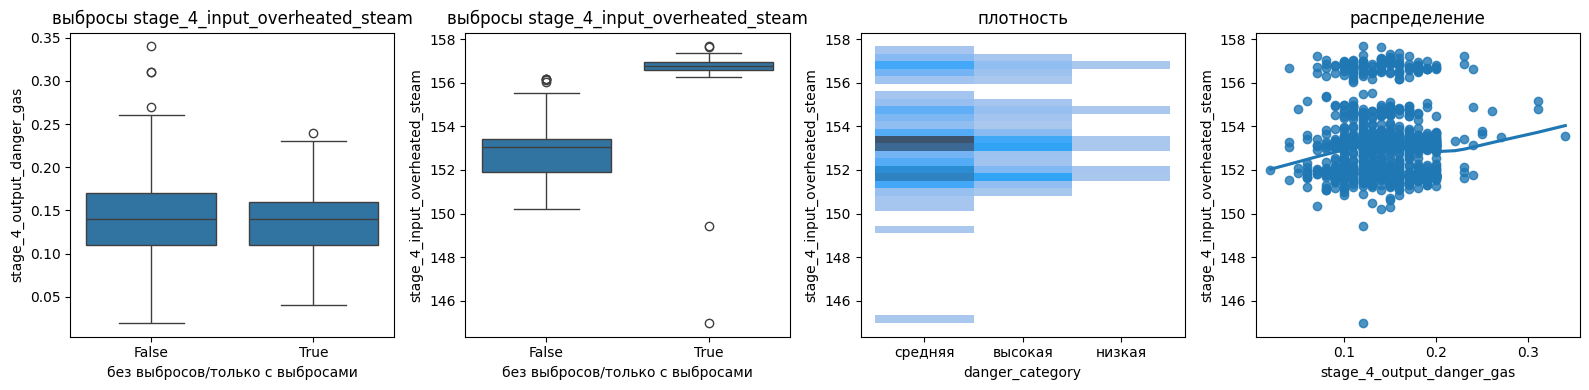

Проверка завимисости опасности газа с stage_4_input_overheated_steam: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1401
Средний выход продукта: 153.3098

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9794, p-значение = 3.39e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9045, p-значение = 1.13e-23

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.0060, p-значение: 8.5505e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


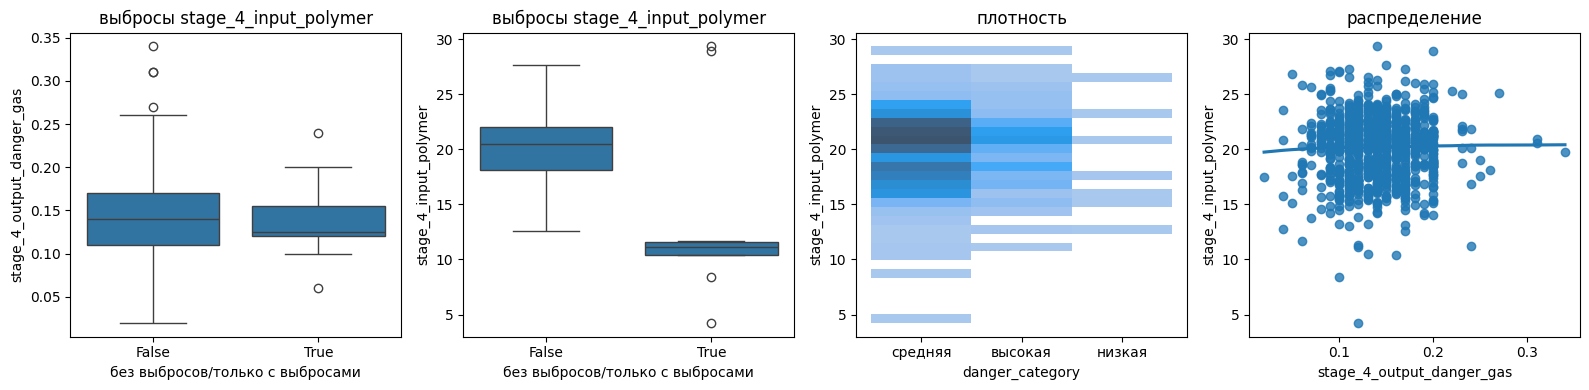

Проверка завимисости опасности газа с stage_4_input_polymer: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1402
Средний выход продукта: 20.0901

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 4.07e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9852, p-значение = 4.75e-08

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.0225, p-значение: 4.9461e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


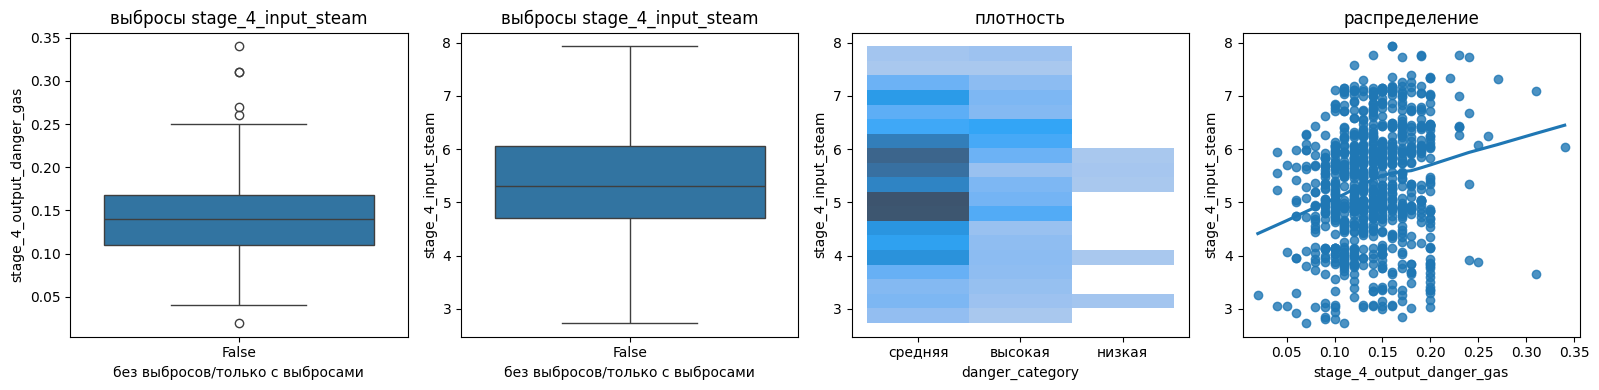

Проверка завимисости опасности газа с stage_4_input_steam: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1395
Средний выход продукта: 5.3406

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9788, p-значение = 3.25e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9896, p-значение = 4.93e-06

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.2158, p-значение: 4.9502e-11

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


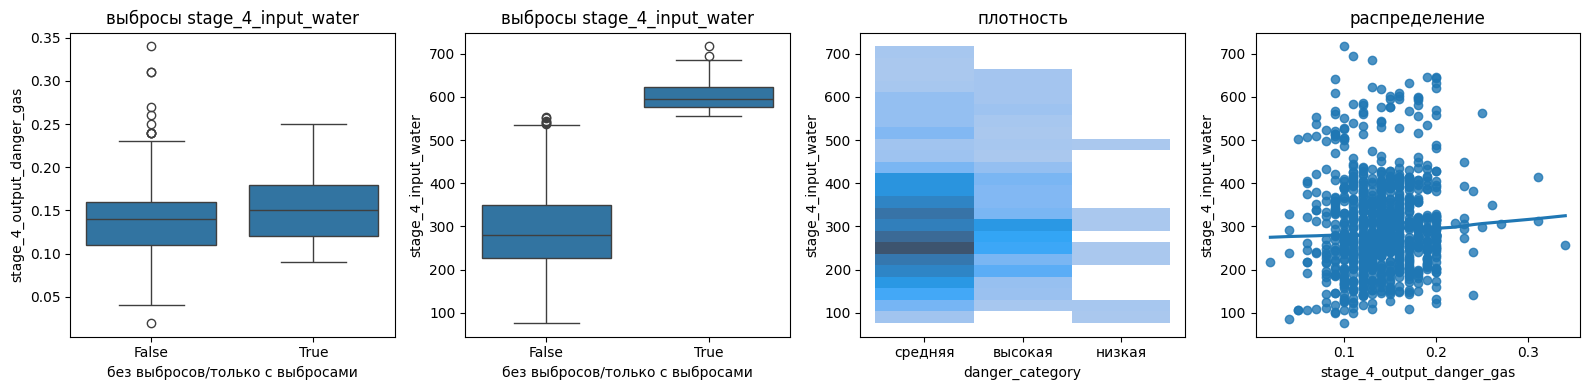

Проверка завимисости опасности газа с stage_4_input_water: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1402
Средний выход продукта: 302.1096

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9794, p-значение = 4.54e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9546, p-значение = 3.45e-16

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.0862, p-значение: 9.1952e-03

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


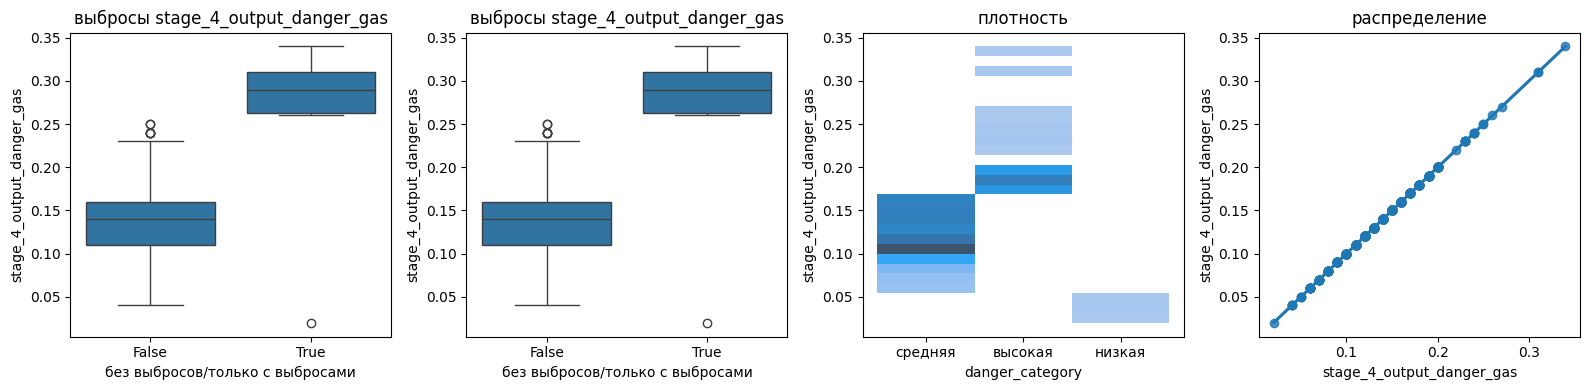

Проверка завимисости опасности газа с stage_4_output_danger_gas: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1401
Средний выход продукта: 0.1401

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.41e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.41e-10

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 1.0000, p-значение: 0.0000e+00

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


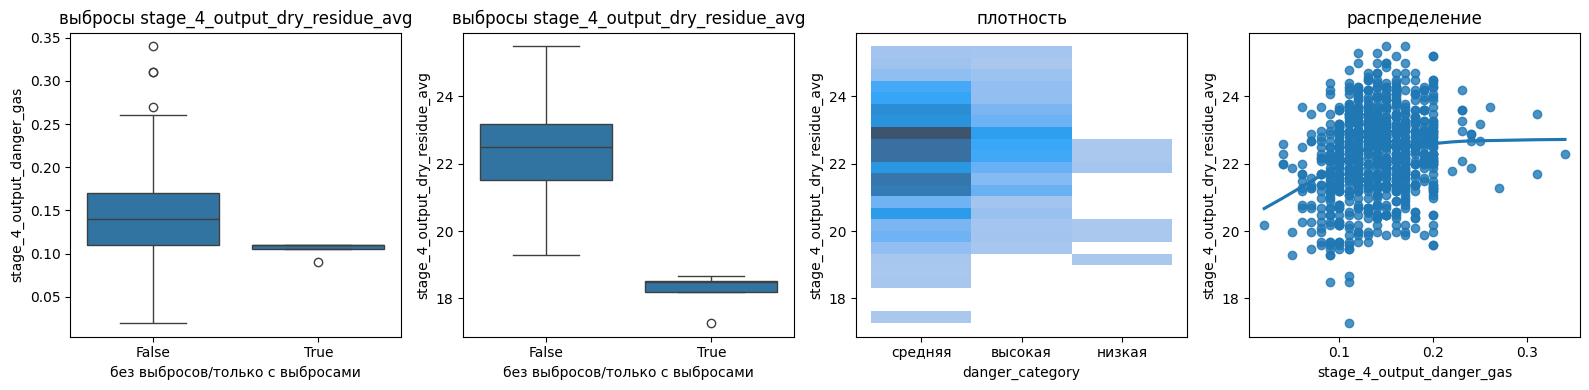

Проверка завимисости опасности газа с stage_4_output_dry_residue_avg: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1401
Средний выход продукта: 22.3242

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.41e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9926, p-значение = 1.30e-04

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: 0.2074, p-значение: 1.5554e-10

Результат: Есть ВОЗМОЖНАЯ статистически значимая связь между долей опасного газа и количеством выходного продукта.

################################################################################################################################################################


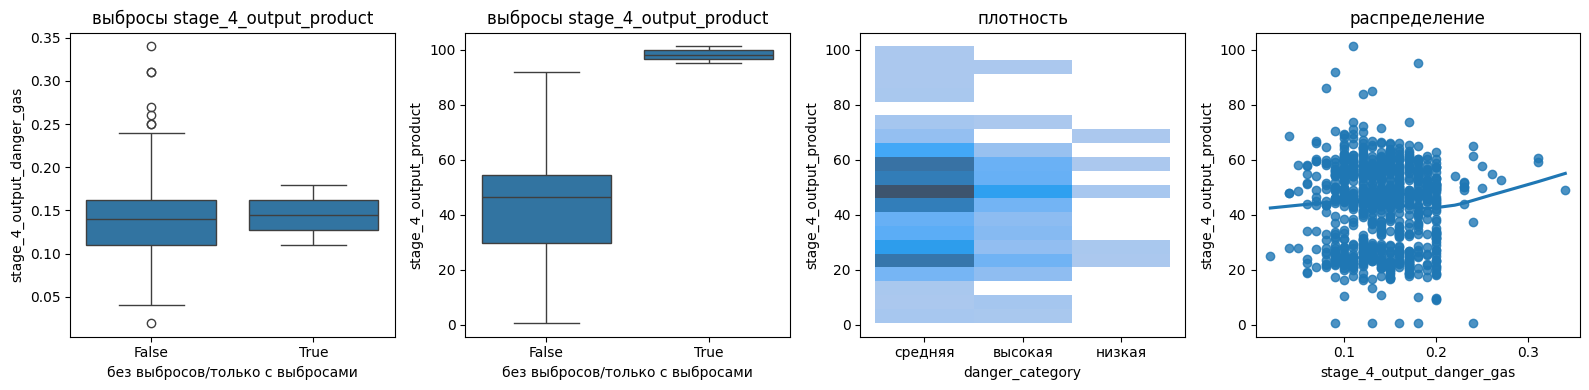

Проверка завимисости опасности газа с stage_4_output_product: 
Основные статистические характеристики:
Средняя доля опасного газа: 0.1401
Средний выход продукта: 43.5764

Проверка нормальности распределения:
stage_4_output_danger_gas
Тест Шапиро-Уилка: W-статистика = 0.9795, p-значение = 3.41e-10
stage_4_output_product
Тест Шапиро-Уилка: W-статистика = 0.9617, p-значение = 6.35e-15

Анализ корреляции:
Хотя бы одна переменная ненормально распределена. Применяем корреляцию Спирмена.

Результаты корреляционного анализа:
Коэффициент ранговой корреляции Спирмена: -0.0517, p-значение: 1.1429e-01

Результат: Значимой связи между долей опасного газа и количеством выходного продукта не обнаружено.

################################################################################################################################################################


In [205]:
def analyze_danger_gas_with_outliers(df, danger_gas_col, feature_col):
    """
    Гибрид моей идеи и алгоритма Алины. Выводит 4 графика и определяет возможное
    наличие корреляции между признаками

    Аргументы:
        df: DataFrame с НЕОБРАБОТАННЫМИ(почти) данными
        danger_gas_col: просто строка с названием всеми известного столбца.
        feature_col: столбец, с которым будет вычисляться зависимость и строятся графики.
    """

    # быстро и легко вычисляем выбросы, используя мнодитель 1.5
    def detect_outliers_iqr(series):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - iqr * 1.5
        upper_bound = q3 + iqr * 1.5
        return series[(series < lower_bound) | (series > upper_bound)]

    #создаём новый бинарный фактор исходя из данных в факторе feature_col
    df_outliers = df.copy()
    df_outliers['без выбросов/только с выбросами'] = False
    outliers_indices = detect_outliers_iqr(df[feature_col]).index
    df_outliers.loc[outliers_indices, 'без выбросов/только с выбросами'] = True

    #Строим четыре графика
    fig, axes = plt.subplots( 1, 4, figsize=(16, 4))

    # выводим разброс значений 'stage_4_output_danger_gas' разделяя на два ящика с усами
    # в зависимости от того,является ли значение в новосозданном факторе выбросом
    sns.boxplot(x='без выбросов/только с выбросами', y=danger_gas_col, data=df_outliers, ax=axes[0])
    axes[0].set_title(f"выбросы {col}")

    # выводим разброс значений входного фактора feature_col разделяя на два ящика с усами
    #в зависимости от того, является ли значение в этом факторе выбросом
    sns.boxplot(x='без выбросов/только с выбросами', y=feature_col, data=df_outliers, ax=axes[1])  # Replace 'Temperature' with your feature column
    axes[1].set_title(f"выбросы {col}")

    #Карта теплоты
    sns.histplot(x='danger_category', y=feature_col, data=df_outliers, ax=axes[2])  # Replace 'Temperature' with your feature column
    axes[2].set_title("плотность")

    #Распределение feature_col в зависимости от 'stage_4_output_danger_gas'
    sns.regplot(x=danger_gas_col, y=feature_col, data=df_outliers, ax=axes[3], lowess=True)
    axes[3].set_title("распределение")

    plt.tight_layout()
    plt.show()

    #Дальше идёт алгоритм Алины
    df_temp = df_outliers.copy()

    df_temp = df_temp[df_temp[col].isnull() == False]

    print(f"Проверка завимисости опасности газа с {col}: ")
    test_hypothesis_4(df_temp['stage_4_output_danger_gas'], df_temp[col])
    print()
    print("#" * 160)

    #print(df_outliers.groupby('IsOutlier')[danger_gas_col].describe())

#Алгоритм Агаты для категоризации 'stage_4_output_danger_gas'
def get_danger_category(value):
        if pd.isna(value):
            return np.nan
        elif value <= 0.05:
            return "низкая"
        elif value <= 0.16:
            return "средняя"
        else:
            return "высокая"

df_out = df.copy()

df_out['danger_category'] = df_out['stage_4_output_danger_gas'].apply(get_danger_category)

for col in df.columns[:-1]:
    analyze_danger_gas_with_outliers(df_out, 'stage_4_output_danger_gas', col)


И тут назревает вопрос - как понять, есть ли зависимость? Единственная моя теория, это смотреть на плотность выбросов 'stage_4_output_danger_gas', значение которых **ВНИМАТЕЛЬНО** > 20. Если они находятся плотно друг к другу или просто лежат в одной половине графика, с учётом того, что в другой половине графика от общего числа всех значений не меньше половины.

Нельзя ориентироваться на первые два графика без учёта одного из следующих. Яркий пример этому **Проверка завимисости опасности газа с stage_3_output_temp_top**

Нет времени интегрировать модель в код выше, поэтому напишк её здесь. Чем больше r2 и меньше mse, тем сильнее признаки зависимы друг от друга

In [225]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, PoissonRegressor, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

def analyze_rfr_per_column(df, target_column):
    #да, 50% кода от чата гпт. Нет времени
    # Models to test
    models = {
        "Linear Regression": LinearRegression(),
        "Polynomial Regression (degree=2)": Pipeline([
            ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
        ]),
        "Polynomial Regression (degree=3)": Pipeline([
            ('poly', PolynomialFeatures(degree=3)),
            ('linear', LinearRegression())
        ]),
        "SVR": Pipeline([
            ('scale', StandardScaler()),
            ('svr', SVR(kernel='rbf', C=100, gamma=0.1))
        ]),
        "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "KNN Regressor": KNeighborsRegressor(n_neighbors=5), #Tune n_neighbors as needed.

        # GLM examples (adapt based on your target variable's distribution)
        "Poisson Regression": PoissonRegressor(),  # For count data


    }

    for col in df.columns:
        if col == target_column:
            continue

        X = df[[col]]
        y = df[target_column]
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X)
        y = imputer.fit_transform(y.values.reshape(-1,1)).ravel()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print("\n", col, "\n")
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            if r2 > 0:
                print(f"Model: {model_name}, R-squared: {r2:.3f}")
                print("- " * 20)
        print("\n", "=-=-" * 15)


hybrid_outlier_handling(df, df.columns)

analyze_rfr_per_column(df, 'stage_4_output_danger_gas')



 DateTime 

Model: Random Forest Regressor, R-squared: 0.264
- - - - - - - - - - - - - - - - - - - - 
Model: Gradient Boosting Regressor, R-squared: 0.275
- - - - - - - - - - - - - - - - - - - - 
Model: KNN Regressor, R-squared: 0.294
- - - - - - - - - - - - - - - - - - - - 

 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

 stage_1_output_konv_avd 


 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

 stage_2_input_water_sum 

Model: Polynomial Regression (degree=2), R-squared: 0.017
- - - - - - - - - - - - - - - - - - - - 
Model: Polynomial Regression (degree=3), R-squared: 0.028
- - - - - - - - - - - - - - - - - - - - 

 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

 stage_2_output_bottom_pressure 


 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

 stage_2_output_bottom_temp 

Model: Polynomial Regression (degree=2), R-squared: 0.000
- - - - - - - - - - - - - - - - - - - - 

 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

По одиночке они очень слабо влияют на опасность газа. В этом тесте были использованы модели как для линейных, так и не линейных данных.

для тех кто в танке:


r2 = 0.26 означает, что модель, обученная на определённых признаках и имеющая определённые параметры, объясняет дисперсию данных на 27%, что пипец как мало.

Пока что максимум, которого я достиг, комбинируя факторы, около 40%, что лучше, но всё равно мало. Хотя не известно насколько хорошо можно предсказывать значения.